In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# **Importing and exploring data**

In [ ]:
!wget -c https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip -O ./bluebook-for-bulldozers
!mkdir bulldozers
!unzip bluebook-for-bulldozers -d ./bulldozers

--2024-11-24 06:22:34--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2024-11-24 06:22:34--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

mkdir: cannot create directory ‘bulldozers’: File exists
Archive:  bluebook-for-bulldozers
replace ./bulldozers

In [7]:
data = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',
                   parse_dates=['saledate'])
data.head()

/var/folders/4k/nmthm_w577z8m04r1_ygg7b00000gn/T/ipykernel_65764/4281486694.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [ ]:
data.isnull().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
saledate,0


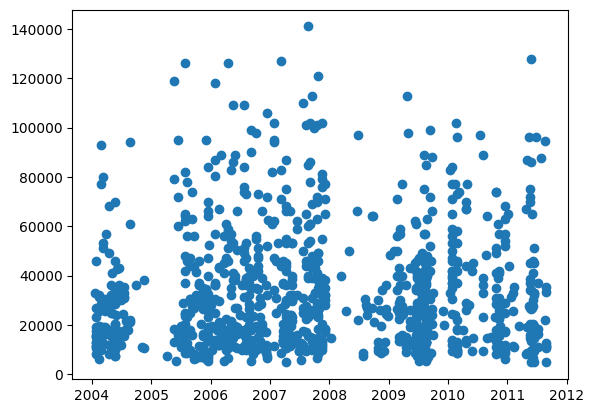

In [ ]:
fig, ax = plt.subplots()

ax.scatter(data['saledate'][:1000], data['SalePrice'][:1000])

Text(0.5, 1.0, 'Sale price distribution')

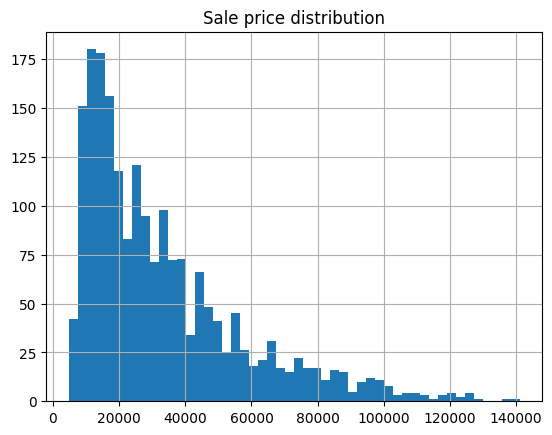

In [ ]:
data['SalePrice'][:2000].hist(bins=50)
plt.title('Sale price distribution')

In [ ]:
data['saledate'].head(20)

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
5,2008-12-18
6,2004-08-26
7,2005-11-17
8,2009-08-27
9,2007-08-09


In [ ]:
data = data.sort_values(by=['saledate'], ascending=True)

In [ ]:
# copy data
data_tmp = data.copy()

# **Feature engineering**

In [ ]:
data_tmp['saleDay'] = data_tmp['saledate'].dt.day
data_tmp['saleMonth'] = data_tmp['saledate'].dt.month
data_tmp['saleYear'] = data_tmp['saledate'].dt.year
data_tmp['saleDayOfWeek'] = data_tmp['saledate'].dt.dayofweek
data_tmp['saleDayOfYear'] = data_tmp['saledate'].dt.dayofyear

In [ ]:
data_tmp = data_tmp.drop('saledate', axis=1)

# **Converting string type to categories type**

In [ ]:
# str_cols = data_tmp.columns

# for col in str_cols:
#   if pd.api.types.is_object_dtype(data_tmp[col]):
#     data_tmp[col] = data_tmp[col].astype("category")

for col, content in data_tmp.items():
  if pd.api.types.is_object_dtype(content):
    data_tmp[col] = content.astype("category").cat.as_ordered()

In [ ]:
data_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
data_tmp['state'].value_counts()

,count
state,
Florida,67320
Texas,53110
California,29761
Washington,16222
Georgia,14633
Maryland,13322
Mississippi,13240
Ohio,12369
Illinois,11540


In [ ]:
data_tmp['state'].cat.codes

,0
205615,43
274835,8
141296,8
212552,8
62755,8
...,...
410879,4
412476,4
411927,4
407124,4


# **Filling null**

## Filling null numeric variables

In [ ]:
data_tmp['MachineHoursCurrentMeter'][data_tmp['saleYear'] != 2012].median()
data_tmp['saleYear'].max()

2012

Spliting data to train and validate before filling null

In [ ]:
# Spliting data to train and validate before filling null

data_tmp_train = data_tmp[data_tmp['saleYear'] != 2012]
data_tmp_val = data_tmp[data_tmp['saleYear'] == 2012]

In [ ]:
for col, content in data_tmp_train.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).any():
      data_tmp_train[col+'_is_missing'] = pd.isnull(content).astype(int)
      data_tmp_train[col] = data_tmp_train[col].fillna(content.median())

for col, content in data_tmp_val.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).any():
      data_tmp_val[col+'_is_missing'] = pd.isnull(content).astype(int)
      data_tmp_val[col] = data_tmp_val[col].fillna(content.median())

<ipython-input-29-45a9cbe6aa5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp_train[col+'_is_missing'] = pd.isnull(content).astype(int)
<ipython-input-29-45a9cbe6aa5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp_train[col] = data_tmp_train[col].fillna(content.median())
<ipython-input-29-45a9cbe6aa5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
# manually add 'auctioneerID_is_missing' column

for col, content in data_tmp_val.items():
  data_tmp_val['auctioneerID_is_missing'] = pd.isnull(content).astype(int)

col_index = data_tmp_train.columns.get_loc('auctioneerID_is_missing')
pop_col = data_tmp_val.pop('auctioneerID_is_missing')
data_tmp_val.insert(col_index, 'auctioneerID_is_missing', pop_col)

<ipython-input-30-db16051f5b23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp_val['auctioneerID_is_missing'] = pd.isnull(content).astype(int)
<ipython-input-30-db16051f5b23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp_val['auctioneerID_is_missing'] = pd.isnull(content).astype(int)
<ipython-input-30-db16051f5b23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
data_tmp_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 393123
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              401125 non-null  int64   
 1   SalePrice                            401125 non-null  float64 
 2   MachineID                            401125 non-null  int64   
 3   ModelID                              401125 non-null  int64   
 4   datasource                           401125 non-null  int64   
 5   auctioneerID                         401125 non-null  float64 
 6   YearMade                             401125 non-null  int64   
 7   MachineHoursCurrentMeter             401125 non-null  float64 
 8   UsageBand                            69639 non-null   category
 9   fiModelDesc                          401125 non-null  category
 10  fiBaseModel                          401125 non-null  category
 11  

In [ ]:
data_tmp_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11573 entries, 405675 to 409203
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   SalesID                              11573 non-null  int64   
 1   SalePrice                            11573 non-null  float64 
 2   MachineID                            11573 non-null  int64   
 3   ModelID                              11573 non-null  int64   
 4   datasource                           11573 non-null  int64   
 5   auctioneerID                         11573 non-null  float64 
 6   YearMade                             11573 non-null  int64   
 7   MachineHoursCurrentMeter             11573 non-null  float64 
 8   UsageBand                            4031 non-null   category
 9   fiModelDesc                          11573 non-null  category
 10  fiBaseModel                          11573 non-null  category
 11  fiSecondaryDes

In [ ]:
data_tmp_train.isnull().sum()
data_tmp_val.isnull().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,7542
fiModelDesc,0


## Filling and converting categorical varaibles to numeric value using (`.codes` method)

In [ ]:
# data_tmp['state'].cat.codes # return Dataframe
pd.Categorical(data_tmp['state']).codes # return array

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [ ]:
for col, content in data_tmp_train.items():
  if not pd.api.types.is_numeric_dtype(content):
    data_tmp_train[col+'_is_missing'] = pd.isnull(content).astype(int)
    data_tmp_train[col] = pd.Categorical(content).codes +1

for col, content in data_tmp_val.items():
  if not pd.api.types.is_numeric_dtype(content):
    data_tmp_val[col+'_is_missing'] = pd.isnull(content).astype(int)
    data_tmp_val[col] = pd.Categorical(content).codes +1

<ipython-input-35-2f1eb598485f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp_train[col+'_is_missing'] = pd.isnull(content).astype(int)
<ipython-input-35-2f1eb598485f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp_train[col] = pd.Categorical(content).codes +1
<ipython-input-35-2f1eb598485f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
data_tmp_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770.0,1821514.0,1505138.0,1671174.0,1329056.0
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363.0,1194089.0,1473654.0,1327630.0,1336053.0
ModelID,8434.0,10150.0,4139.0,8591.0,4089.0
datasource,132.0,132.0,132.0,132.0,132.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,0.0,1.0,0.0,1.0,0.0
Blade_Type_is_missing,0.0,1.0,0.0,1.0,0.0
Travel_Controls_is_missing,0.0,1.0,0.0,1.0,0.0
Differential_Type_is_missing,1.0,0.0,1.0,0.0,1.0


# **Spliting data**

In [ ]:
X_train, y_train = data_tmp_train.drop('SalePrice', axis=1), data_tmp_train['SalePrice']
X_val, y_val = data_tmp_val.drop('SalePrice', axis=1), data_tmp_val['SalePrice']

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

# **Building evaluation metric**

In [ ]:
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_percentage_error, r2_score

def show_score(model):
  train_pred = model.predict(X_train)
  val_pred = model.predict(X_val)
  score = {"train_mape": mean_absolute_percentage_error(y_train, train_pred),
           "val_mape": mean_absolute_percentage_error(y_val, val_pred),
           "train_rmsle": root_mean_squared_log_error(y_train, train_pred),
           "val_rmsle": root_mean_squared_log_error(y_val, val_pred),
           "train_r2": r2_score(y_train, train_pred),
           "val_r2": r2_score(y_val, val_pred)}
  return score

# **Modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time

rf = RandomForestRegressor(n_jobs=-1,
                           random_state=42,
                           max_samples=50000)
rf.fit(X_train, y_train)

CPU times: user 46.7 s, sys: 734 ms, total: 47.4 s
Wall time: 29.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
score_rf = show_score(rf)
score_rf_df = pd.DataFrame(score_rf, index=[0])

In [ ]:
score_rf

{'train_mape': 0.2098641329749551,
 'val_mape': 0.24419370118175873,
 'train_rmsle': 0.25779640029428785,
 'val_rmsle': 0.2936243133705708,
 'train_r2': 0.8607461688686967,
 'val_r2': 0.8328597485872651}

<Axes: title={'center': 'Score'}>

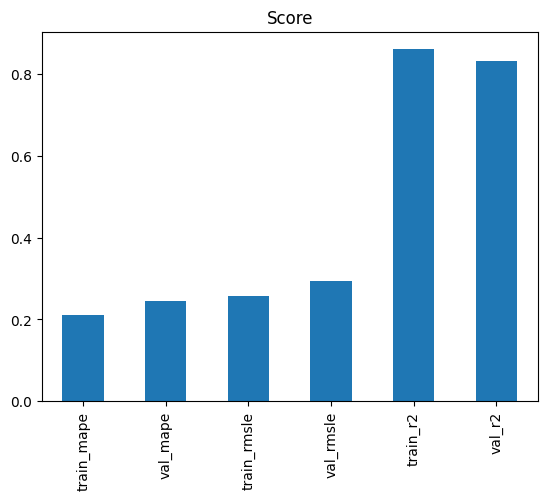

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
score_rf_df.T.plot.bar(title='Score', legend=False, color=colors)

# **Importing test data**

In [10]:
data_test = pd.read_csv('bluebook-for-bulldozers/Test.csv',
                        parse_dates=['saledate'])
data_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [ ]:
data_test.isnull().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,10328
UsageBand,10623
saledate,0
fiModelDesc,0


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [ ]:
data_test['saleDay'] = data_test['saledate'].dt.day
data_test['saleMonth'] = data_test['saledate'].dt.month
data_test['saleYear'] = data_test['saledate'].dt.year
data_test['saleDayOfWeek'] = data_test['saledate'].dt.dayofweek
data_test['saleDayOfYear'] = data_test['saledate'].dt.dayofyear

In [ ]:
data_test = data_test.drop('saledate', axis=1)

In [ ]:
for col, content in data_test.items():
  if pd.api.types.is_object_dtype(content):
    data_test[col] = content.astype('category').cat.as_ordered()

## **Filling null**

In [ ]:
# Filling numerical null variable

for col, content in data_test.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).any():
      data_test[col+'_is_missing'] = pd.isnull(content).astype(int)
      data_test[col] = data_test[col].fillna(content.median())
  # Filling categorical null variable
  if not pd.api.types.is_numeric_dtype(content):
      data_test[col+'_is_missing'] = pd.isnull(content).astype(int)
      data_test[col] = pd.Categorical(content).codes+1

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: float64(1), int16(2), int32(5), int64(51), int8(42)
memory usage: 5.7 MB


## **Prediction**

In [ ]:
set(X_train.columns) - set(data_test.columns)

{'auctioneerID_is_missing'}

In [ ]:
# for col1, col2 in zip(X_train.columns, data_test.columns):
#   if col1 != col2:
#     print(col1, '||', col2)

In [ ]:
# data_test = data_test.drop('auctioneerID_is_missing', axis=1)

In [ ]:
col_index = data_test.columns.get_loc('MachineHoursCurrentMeter_is_missing')
data_test.insert(col_index, 'auctioneerID_is_missing', False)
data_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,1,1,1,1,1,1,1,1,1,1
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,1,1,1,1,1,1,1,1,0,0
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,1,1,1,1,1
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,1,1,1,1,1
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,1,1,1,1,0,0,0,1,1


In [ ]:
y_pred = rf.predict(data_test)

In [ ]:
result = data_test['SalesID'].to_frame()
result['SalePrice'] = y_pred
result.head()

,SalesID,SalePrice
0,1227829,19391.62
1,1227844,26150.50
2,1227847,53250.00
3,1227848,82335.00
4,1227863,42152.50


In [ ]:
# Export csv file
result.to_csv('prediction.csv')

# **Features importance**

In [ ]:
def plot_importance(columns, importance, n=20):
  df = (pd.DataFrame({"features": columns,
                     "features_importance": importance})
       .sort_values("features_importance", ascending=False))

  fig, ax = plt.subplots(figsize=(8,6))
  ax.barh(df['features'][:n], df['features_importance'][:n])
  ax.set_title("Features importance")
  ax.set_xlabel("Importance")
  ax.set_ylabel("Features")
  ax.invert_yaxis()

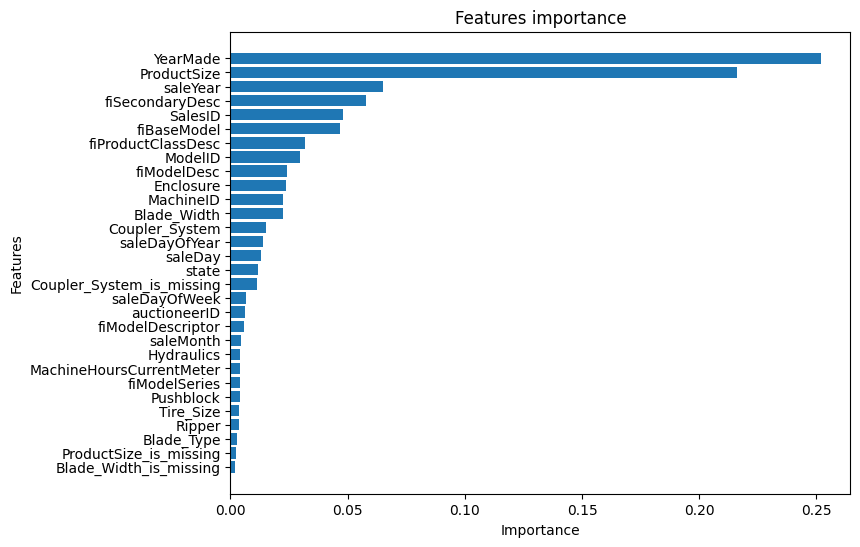

In [ ]:
plot_importance(data_test.columns, rf.feature_importances_, n=30)

In [ ]:
data_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [ ]:
rf.feature_importances_

array([4.81040976e-02, 2.26463293e-02, 2.98903780e-02, 1.00382492e-03,
       6.02531663e-03, 2.51899781e-01, 4.19413585e-03, 1.59615267e-03,
       2.42807230e-02, 4.68982752e-02, 5.76633588e-02, 4.06333386e-03,
       5.68670899e-03, 2.15999788e-01, 3.16970084e-02, 1.16622538e-02,
       1.35121403e-03, 1.87418873e-03, 1.38110164e-03, 2.35077657e-02,
       8.56491727e-04, 2.42589274e-04, 1.43867885e-03, 2.16351206e-04,
       1.24355520e-03, 3.97682201e-05, 1.82919650e-03, 2.23141288e-02,
       4.55383272e-04, 5.27146253e-04, 4.22584978e-03, 4.02970261e-03,
       3.58043016e-03, 3.25663016e-04, 6.15604319e-04, 3.70324028e-03,
       1.49355084e-03, 1.52620759e-02, 7.99643166e-04, 4.99340217e-05,
       2.48500867e-04, 1.24155622e-03, 1.60176082e-03, 9.16449795e-04,
       7.35594081e-04, 8.67797319e-04, 1.84467104e-04, 2.67764308e-03,
       1.15549492e-03, 2.08068128e-04, 1.70677325e-04, 1.28563423e-02,
       4.63436889e-03, 6.49063121e-02, 6.64484478e-03, 1.37912905e-02,
      